# Skillbox — Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva. 

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set3')

import os

## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [77]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [78]:
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [4]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски. 
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных 

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



<AxesSubplot:>

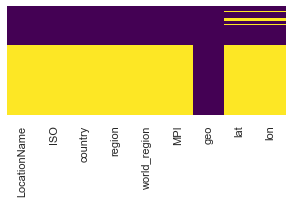

In [83]:
sns.heatmap(df_mpi.isnull(),cbar=False, yticklabels=False, cmap = 'viridis')

<AxesSubplot:>

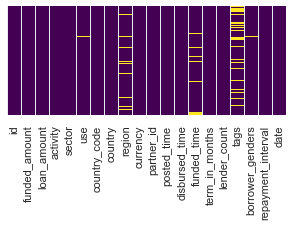

In [80]:
sns.heatmap(df_kiva_loans.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [7]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [8]:
df_kiva_loans.describe(include=[np.object])

<ipython-input-8-ae14ccb05771>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_kiva_loans.describe(include=[np.object])


,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


**Что мы видим?**

В некоторых колонках присутствуют пропуски. 

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```. 

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [9]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [10]:
df_kiva_loans.dropna(inplace=True)

Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [11]:
len(df_kiva_loans)

423081

_____________

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных? 

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




In [12]:
df_temp = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']].copy()
df_temp.head(3)

,term_in_months,lender_count,loan_amount
2,43.0,6,150.0
6,43.0,8,200.0
7,14.0,8,400.0


In [13]:
df_corr = df_temp.corr()
df_corr

,term_in_months,lender_count,loan_amount
term_in_months,1.000000,0.227787,0.140669
lender_count,0.227787,1.000000,0.884940
loan_amount,0.140669,0.884940,1.000000


Text(0.5, 1.0, 'Корреляция между параметрами')

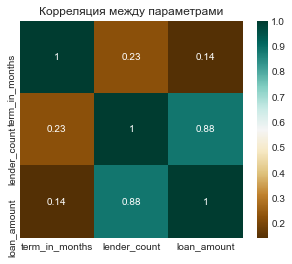

In [14]:
plt.figure(figsize = (5,4))

ax = sns.heatmap(df_corr, cmap='BrBG', annot=True)
ax.set_title('Корреляция между параметрами')

In [15]:
print('Стандартное отклонение для столбца {}: '.format('loan_amount'))
df_temp['loan_amount'].std()

Стандартное отклонение для столбца loan_amount: 


1134.6539795148606

In [16]:
print('Среднее для столбца {}: '.format('loan_amount'))
df_temp['loan_amount'].mean()

Среднее для столбца loan_amount: 


849.4518189188359

In [17]:
print('Квантиль (0.9) {}: '.format('loan_amount'))
df_temp['loan_amount'].quantile(q=0.8)

Квантиль (0.9) loan_amount: 


1125.0

#### Вывод:

Существует устойчивая взаимосвязь между количеством кредиторов, которые внесли свой вклад в этот кредит, и суммой займа. С учетом данных о среднем значении суммы займа, его стандартном отклонении и процентиле _80% можно сделать вывод, что получение большей суммы займа преимущественно зависит от возможности привлечь большее количество кредиторов

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

Text(0.5, 1.0, 'Разброс показателя funded_amount')

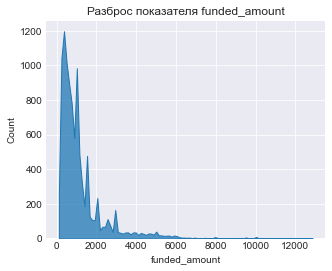

In [18]:
plt.figure(figsize = (5,4))

ax = sns.histplot(data=df_kiva_loans[:10000], x='funded_amount', bins=100, element='poly')
ax.set_title('Разброс показателя funded_amount')

#### Вывод:

Кол-во займов с суммой >10000 фактически стремиться к нулю. Больгая часть заяймов (с точки зрения количества) - это займы с суммой до 6000 долларов

### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены? 

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [19]:
df_temp = df_kiva_loans[df_kiva_loans['loan_amount'] > 20000].copy()
df_temp.head(8)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,212.0,2014-03-21 05:25:02+00:00,2014-05-21 07:00:00+00:00,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21
38725,691328,25000.0,25000.0,Construction Supplies,Construction,To supply construction materials for a vocatio...,RW,Rwanda,Kigali,USD,319.0,2014-03-31 09:43:06+00:00,2014-03-26 07:00:00+00:00,2014-04-16 22:14:29+00:00,7.0,821,"user_favorite, #Repeat Borrower, #Unique, #Job...",male,irregular,2014-03-31
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,212.0,2014-04-09 08:25:02+00:00,2014-06-09 07:00:00+00:00,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09
53634,706146,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,UG,Uganda,Kampala,USD,212.0,2014-05-06 09:25:03+00:00,2014-07-06 07:00:00+00:00,2014-05-18 15:31:08+00:00,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10
71650,723795,25000.0,25000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power Solar Lighting ...,UG,Uganda,Kasese,USD,212.0,2014-06-12 08:25:02+00:00,2014-08-12 07:00:00+00:00,2014-07-10 12:37:47+00:00,14.0,755,"#Post-disbursed, #Eco-friendly, user_favorite,...",male,bullet,2014-06-12
121806,773118,26750.0,26750.0,Agriculture,Agriculture,To buy and plant resin producing pine trees – ...,MX,Mexico,Patamban,USD,376.0,2014-09-22 22:43:04+00:00,2014-08-22 07:00:00+00:00,2014-10-22 14:20:01+00:00,144.0,822,"user_favorite, #Inspiring Story, #Unique, #Job...","male, male, female, female, male, male, female",irregular,2014-09-22
123268,774331,29050.0,29050.0,Agriculture,Agriculture,to buy and plant resin producing pine trees. T...,MX,Mexico,San José de Cañas,USD,376.0,2014-09-24 20:46:55+00:00,2014-08-25 07:00:00+00:00,2014-11-17 16:46:29+00:00,120.0,828,"volunteer_like, volunteer_pick, user_favorite,...","male, male, male, male, male, male, male, male...",irregular,2014-09-24


In [20]:
df_temp.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.075174e+06,39777.848101,39777.848101,415.620253,29.924051,1137.848101
std,1.978744e+05,12531.653504,12531.653504,108.864336,32.990198,403.740653
min,6.870450e+05,24000.000000,24000.000000,156.000000,4.000000,439.000000
25%,8.706230e+05,30000.000000,30000.000000,319.000000,14.000000,825.000000
50%,1.156972e+06,40000.000000,40000.000000,431.000000,14.000000,1067.000000
75%,1.222876e+06,50000.000000,50000.000000,505.500000,31.500000,1443.500000
max,1.325702e+06,100000.000000,100000.000000,535.000000,144.000000,2986.000000


In [21]:
len(df_temp)

79

Text(0.5, 1.0, 'Кол-во заявок с суммой более 20000$ в разрезе стран')

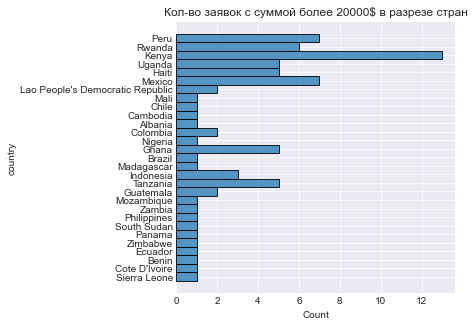

In [22]:
plt.figure(figsize = (5,5))

ax = sns.histplot(data=df_temp, y='country')
ax.set_title('Кол-во заявок с суммой более 20000$ в разрезе стран')

Text(0.5, 1.0, 'Кол-во заявок с суммой более 20000$ в разрезе секторов')

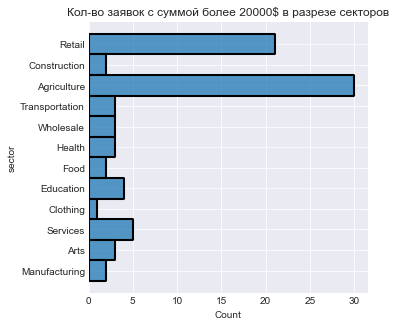

In [23]:
plt.figure(figsize = (5,5))

ax = sns.histplot(data=df_temp, y='sector')
ax.set_title('Кол-во заявок с суммой более 20000$ в разрезе секторов')

____________

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [24]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


In [25]:
df_temp = df_mpi.groupby('region').mean().sort_values('MPI', ascending=False)
df_temp

,MPI,lat,lon
region,,,
Lac,0.744,18.328143,-77.240515
Wadi Fira,0.709,15.089242,21.475285
Sila,0.697,12.130740,21.284502
Kanem,0.696,12.906160,105.219481
Sahel,0.690,14.100086,-0.149499
...,...,...,...
Galapagos Island,0.003,-0.205173,-78.489694
As-swidaa,0.002,32.712897,36.566286
Tashkent,0.001,NaN,NaN


### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

In [26]:
df_temp = df_mpi.dropna().sort_values('MPI', ascending=False)
df_temp.head()


,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
888,"Lac, Chad",TCD,Chad,Lac,Sub-Saharan Africa,0.744,"(18.3281428, -77.2405153)",18.328143,-77.240515
900,"Wadi Fira, Chad",TCD,Chad,Wadi Fira,Sub-Saharan Africa,0.709,"(15.0892416, 21.4752851)",15.089242,21.475285
61,"Est, Burkina Faso",BFA,Burkina Faso,Est,Sub-Saharan Africa,0.698,"(12.4365526, 0.9056623)",12.436553,0.905662
898,"Sila, Chad",TCD,Chad,Sila,Sub-Saharan Africa,0.697,"(12.13074, 21.2845025)",12.130740,21.284502
887,"Kanem, Chad",TCD,Chad,Kanem,Sub-Saharan Africa,0.696,"(12.90616, 105.2194808)",12.906160,105.219481


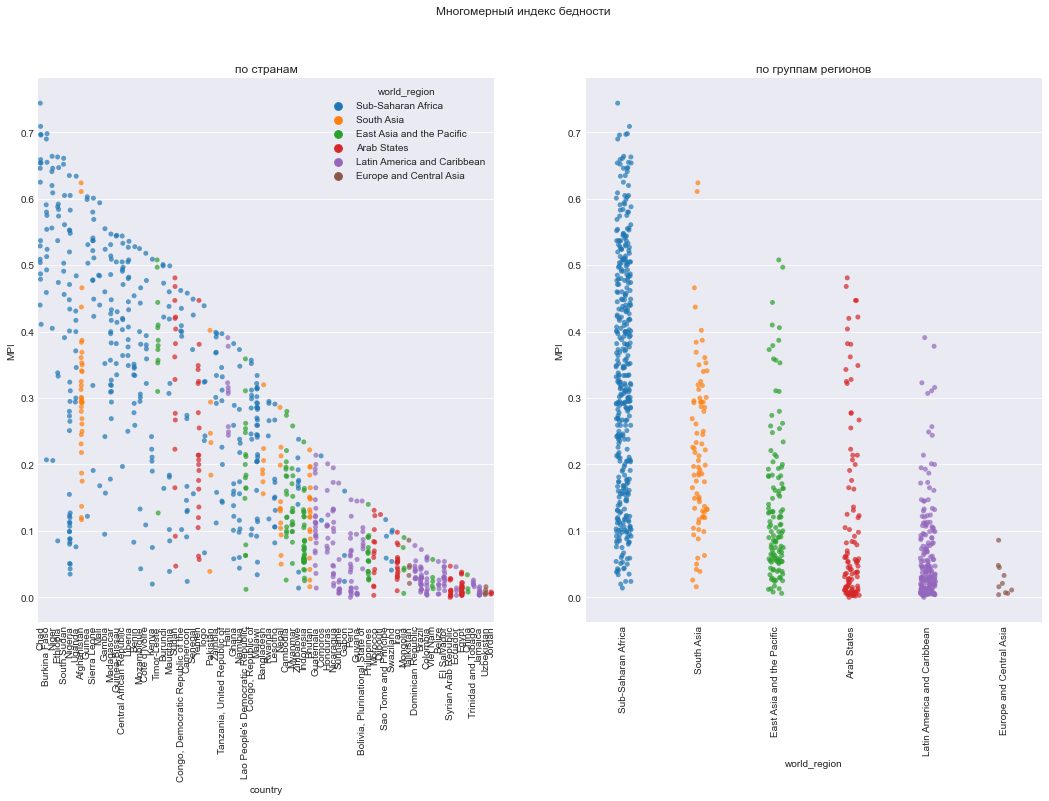

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Многомерный индекс бедности')

sns.stripplot(ax=axes[1], data=df_temp, x='world_region', y='MPI', alpha=0.7, marker='o')
axes[1].set_title('по группам регионов')
axes[1].tick_params(axis='x', rotation=90)


sns.stripplot(ax=axes[0], data=df_temp, x='country', y='MPI', hue='world_region', alpha=0.7, marker='o')
axes[0].set_title('по странам')
axes[0].tick_params(axis='x', rotation=90)


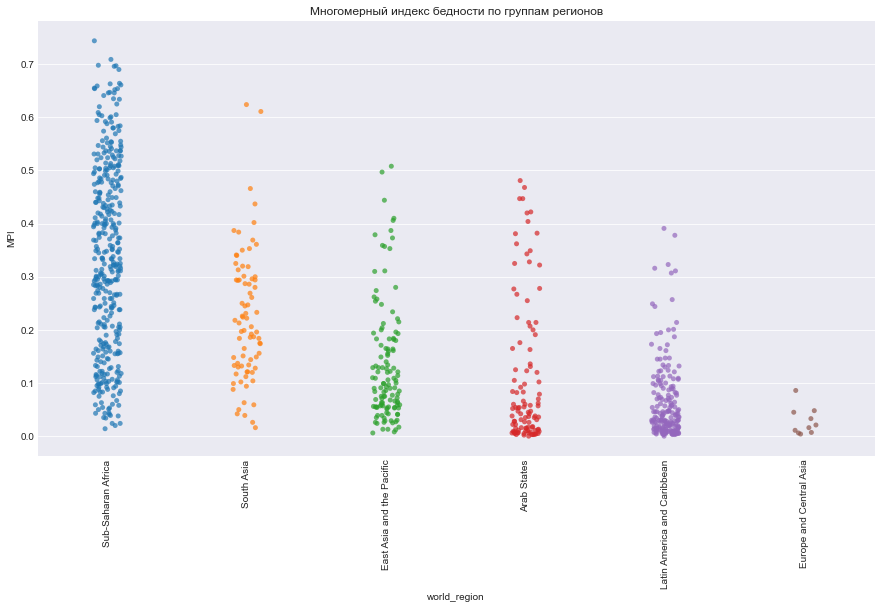

In [28]:
plt.figure(figsize = (15,8))

ax = sns.stripplot(data=df_temp, x='world_region', y='MPI', alpha=0.7, marker='o')
ax.set_title('Многомерный индекс бедности по группам регионов')
ax.tick_params(axis='x', rotation=90)


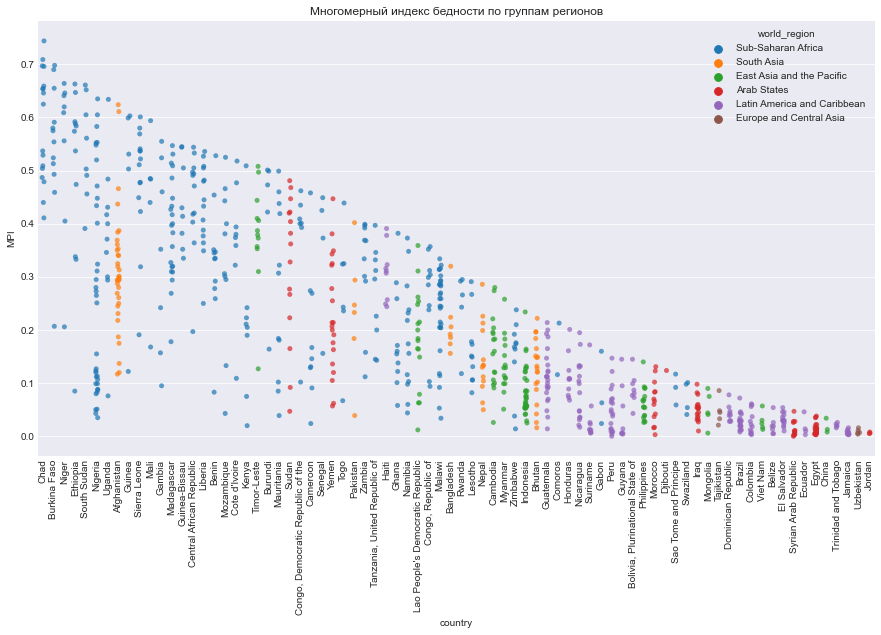

In [29]:
plt.figure(figsize = (15,8))

ax = sns.stripplot(data=df_temp, x='country', y='MPI', hue='world_region', alpha=0.7, marker='o')
ax.set_title('Многомерный индекс бедности по группам регионов')
ax.tick_params(axis='x', rotation=90)


 __________________________
 

### Задание 3. Наличие корреляции между между странами, полом заёмщика и суммой займа


In [30]:
df_temp = df_kiva_loans[['country', 'borrower_genders', 'loan_amount']].copy()
df_temp.describe(include=[np.object])

<ipython-input-30-b2fd29b1aa6a>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_temp.describe(include=[np.object])


,country,borrower_genders
count,423081,423081
unique,81,8116
top,Philippines,female
freq,91317,263421


Как видим, количество уникальных значений в поле "borrower_genders" 8116, поэтому датасет нуждается в дополнительных аналитиках. Добавим поля "borrower_male", "borrower_female" и "borrower_group", а также факторизируем в колонку "country_f" название стран

In [31]:
df_temp['borrower_male'] = np.where(df_temp['borrower_genders']=='male', 1, 0)
df_temp['borrower_female'] = np.where(df_temp['borrower_genders']=='female', 1, 0)
df_temp['borrower_group'] = np.where((df_temp['borrower_genders']!='male') & (df_temp['borrower_genders']!='female'), 1, 0)
df_temp['country_f'] = pd.factorize(df_temp['country'])[0]


In [32]:
df_temp.tail()

,country,borrower_genders,loan_amount,borrower_male,borrower_female,borrower_group,country_f
671107,Tajikistan,female,350.0,0,1,0,16
671110,Paraguay,"female, female, female, female, female, female...",2700.0,0,0,1,47
671133,Tajikistan,female,475.0,0,1,0,16
671134,Paraguay,"female, female, female, female, female, female...",3525.0,0,0,1,47
671141,Tajikistan,female,175.0,0,1,0,16


In [33]:
df_temp.describe()

,loan_amount,borrower_male,borrower_female,borrower_group,country_f
count,423081.000000,423081.000000,423081.000000,423081.000000,423081.000000
mean,849.451819,0.199009,0.622625,0.178365,17.665721
std,1134.653980,0.399255,0.484730,0.382820,17.530904
min,25.000000,0.000000,0.000000,0.000000,0.000000
25%,300.000000,0.000000,0.000000,0.000000,7.000000
50%,500.000000,0.000000,1.000000,0.000000,9.000000
75%,1000.000000,0.000000,1.000000,0.000000,23.000000
max,100000.000000,1.000000,1.000000,1.000000,80.000000


In [34]:
df_corr = df_temp.corr()
df_corr

,loan_amount,borrower_male,borrower_female,borrower_group,country_f
loan_amount,1.000000,-0.004897,-0.264572,0.340110,0.198036
borrower_male,-0.004897,1.000000,-0.640250,-0.232241,0.169388
borrower_female,-0.264572,-0.640250,1.000000,-0.598471,-0.155267
borrower_group,0.340110,-0.232241,-0.598471,1.000000,0.019941
country_f,0.198036,0.169388,-0.155267,0.019941,1.000000


Text(0.5, 1.0, 'Корреляция между параметрами')

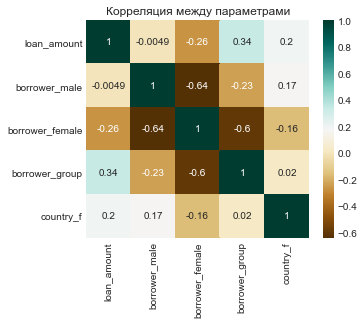

In [35]:
plt.figure(figsize = (5,4))

ax = sns.heatmap(df_corr, cmap='BrBG', annot=True)
ax.set_title('Корреляция между параметрами')

#### Вывод:
Фактически, можно сделать вывод об отсутствии какой-либо связи между полом заемщика, страной и суммой займа

 __________________________
 

### Задание 4. Присутствие аномалий в данных по займам


Text(0.5, 1.0, 'Наличие выбросов в данных по займам в разрезе отраслей')

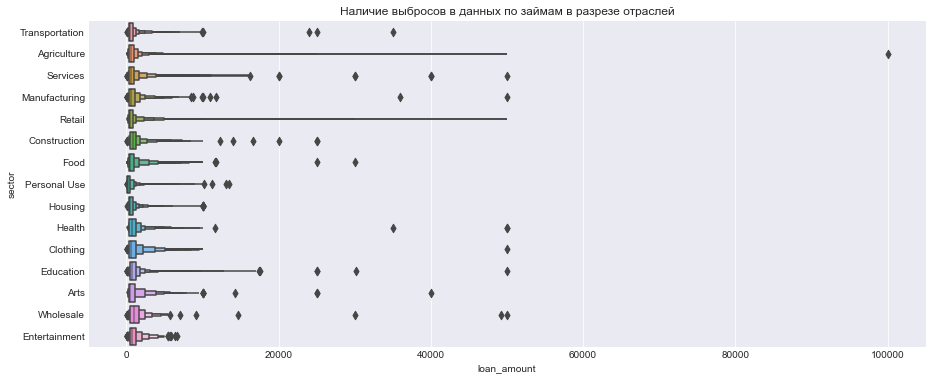

In [36]:
plt.figure(figsize = (15, 6))

ax = sns.boxenplot(data=df_kiva_loans, y='sector', x='loan_amount')
ax.set_title('Наличие выбросов в данных по займам в разрезе отраслей')


#### Наблюдение:
    Для всех отраслей наблюдается приблизительно одинаковая картина с тз миниальных и максимальных значений, нижние и верхние квартили отличаются несущественно. Даже выбросы данных схожи для всех категорий, кроме "Personal use", "Housing", "Entertainment" и "Food"


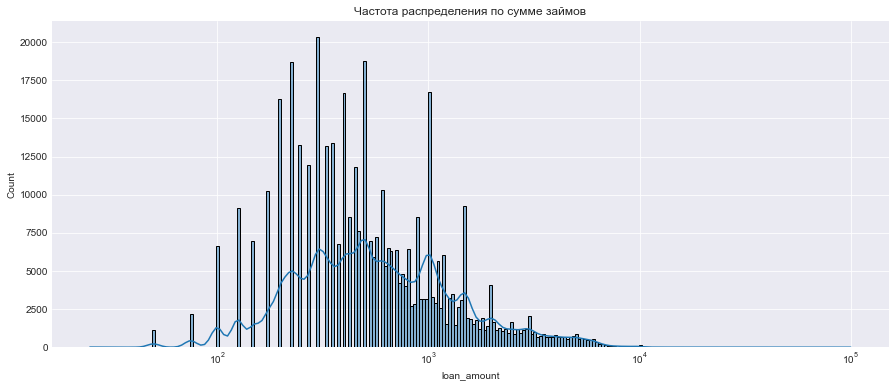

In [37]:
plt.figure(figsize = (15, 6))

ax = sns.histplot(data=df_kiva_loans, x='loan_amount', log_scale=True, kde=True)
ax.set_title('Частота распределения по сумме займов')
ax.tick_params(axis='x', rotation=0)


#### Наблюдение:
    Основаной объем займов колеблется от 100 до 10000 USD. Займы с другими суммами с точки зрения объема выборки не существенны

#### Вывод:
    В выборке присутствуют аномальные значения. Таковыми можно считать займы с суммой, более 20 тыс USD. 

### Задание 5. Зависимость уровня бедности от региона проживания пользователей


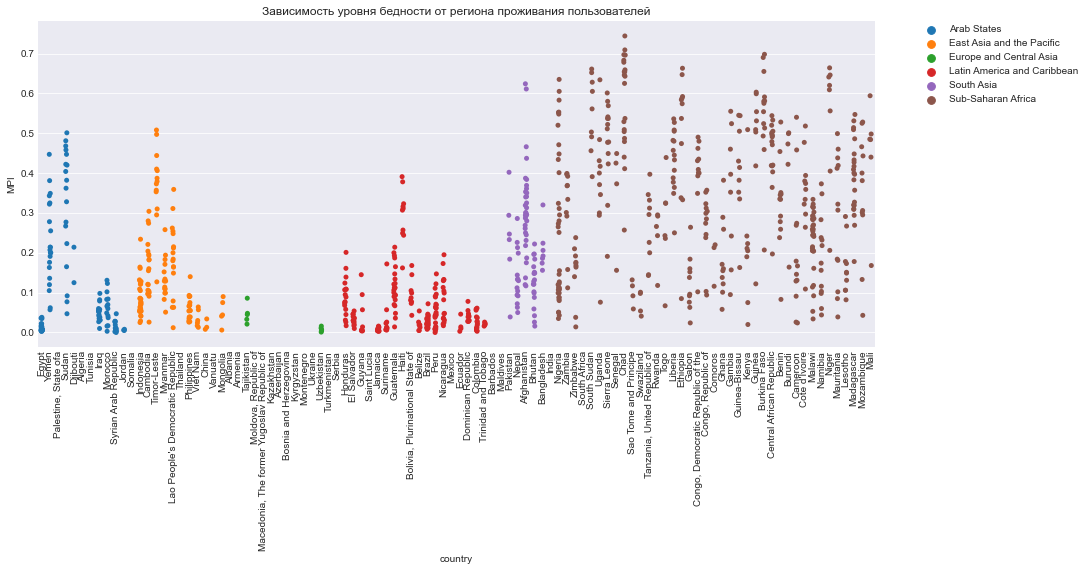

In [38]:
plt.figure(figsize = (15, 6))

ax = sns.stripplot(x="country", y="MPI", data=df_mpi.sort_values('world_region'), hue='world_region')
ax.set_title('Зависимость уровня бедности от региона проживания пользователей')
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


### Задание 6. Влияние многомерного индекса бедности в разных странах на суммы займов и сроки погашения


In [39]:
df_tmp1 = df_kiva_loans.copy()
df_tmp2 = df_mpi.copy()
df_tmp = pd.merge(df_tmp1, df_tmp2, on='country', how='left')
df_tmp.tail(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region_x,currency,...,repayment_interval,date,LocationName,ISO,region_y,world_region,MPI,geo,lat,lon
4922381,1339713,175.0,175.0,Sewing,Services,to purchase of a digital sewing machine for em...,TJ,Tajikistan,Hamadoni,TJS,...,monthly,2017-07-14,"Khatlon, Tajikistan",TJK,Khatlon,Europe and Central Asia,0.086,"(37.9113562, 69.097023)",37.911356,69.097023


In [43]:
df_tmp_gr = df_tmp[['country', 'world_region', 'region_y', 'MPI', 'loan_amount', 'term_in_months']]
df_tmp_gr.tail(3)

,country,world_region,region_y,MPI,loan_amount,term_in_months
4922379,Tajikistan,Europe and Central Asia,Sughd,0.033,175.0,14.0
4922380,Tajikistan,Europe and Central Asia,Districts of Republican Subordination,0.045,175.0,14.0
4922381,Tajikistan,Europe and Central Asia,Khatlon,0.086,175.0,14.0


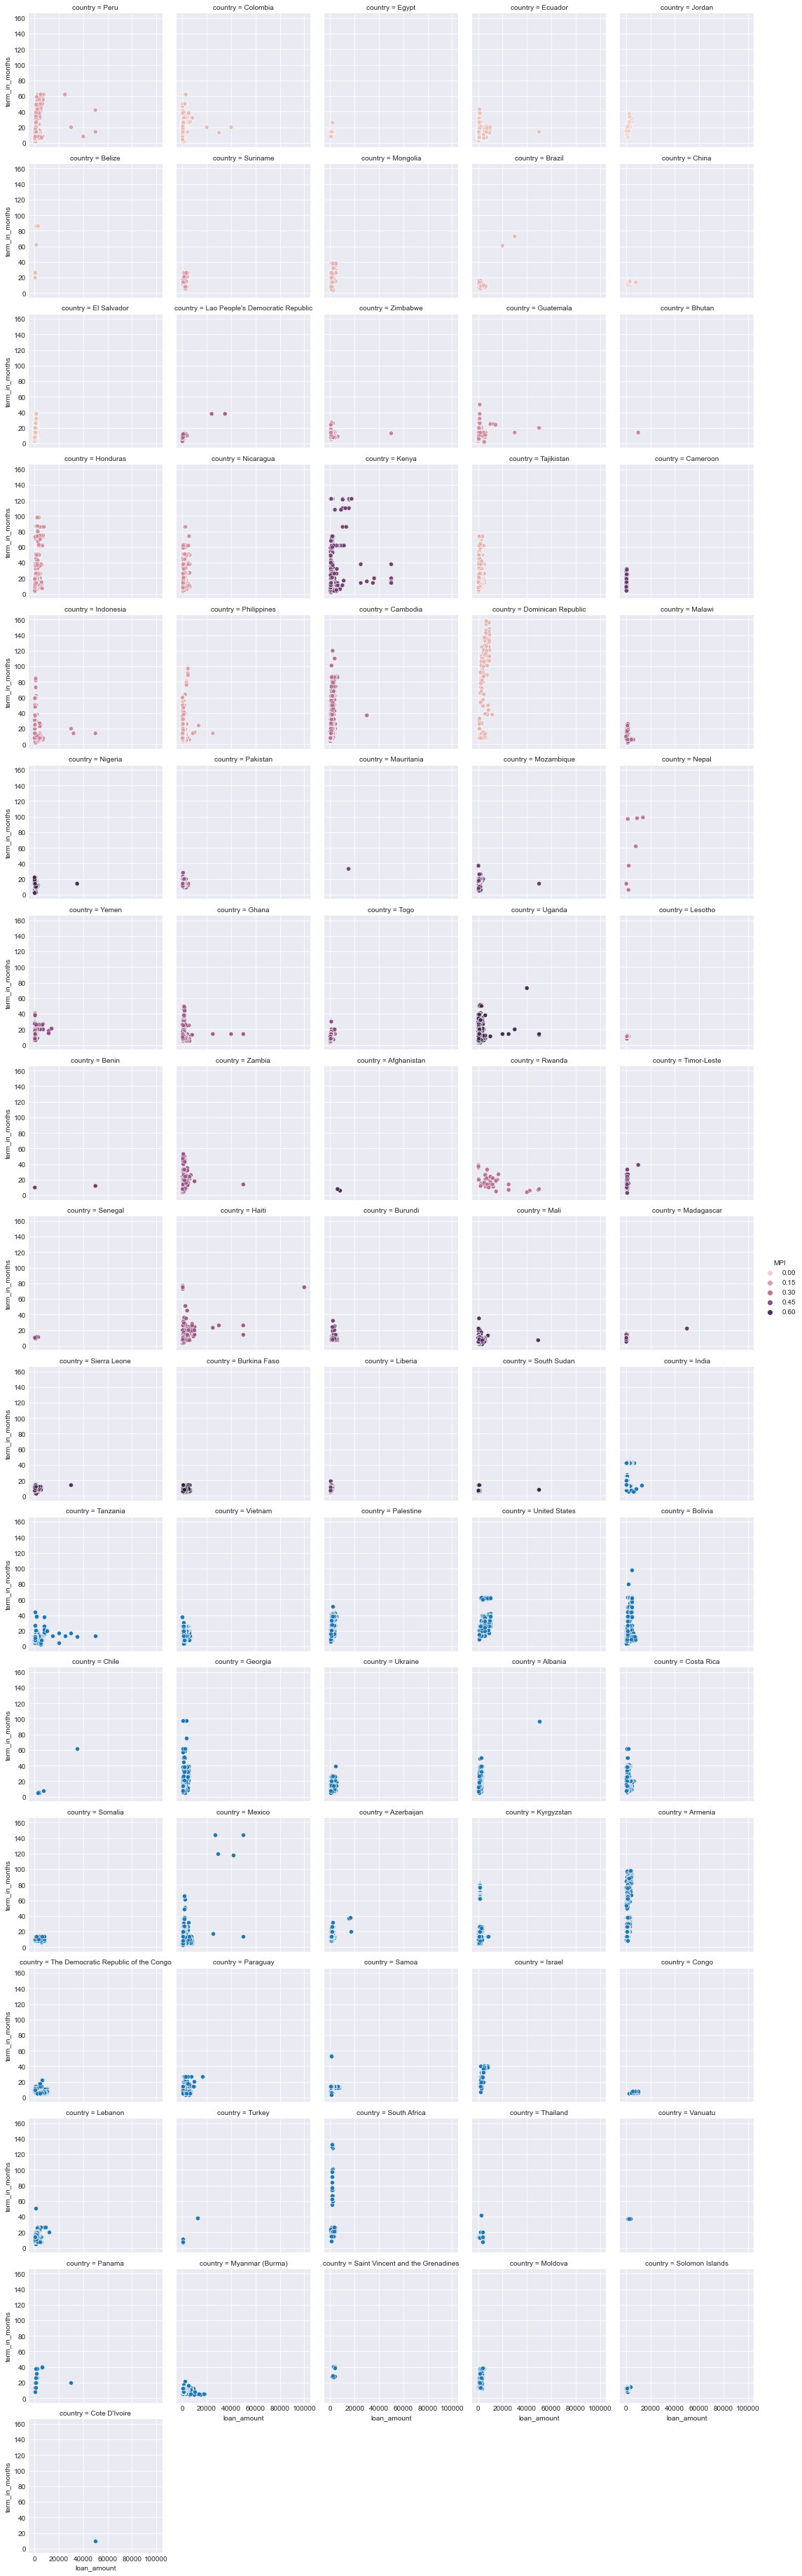

In [51]:
g = sns.relplot(x="loan_amount", y="term_in_months", hue="MPI",
            col="country", col_wrap=5, height=3,
                data=df_tmp_gr.sort_values('MPI'));

In [48]:
df_tmp_gr_corr = df_tmp_gr.corr()
df_tmp_gr_corr.tail()

,MPI,loan_amount,term_in_months
MPI,1.000000,-0.001221,-0.000292
loan_amount,-0.001221,1.000000,0.125816
term_in_months,-0.000292,0.125816,1.000000


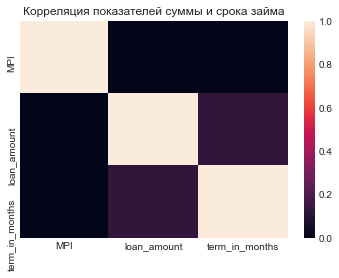

In [61]:
g = sns.heatmap(df_tmp_gr_corr).set(title='Корреляция показателей суммы и срока займа')

In [52]:
df_tmp_gr = df_tmp_gr.groupby('country').mean()
df_tmp_gr.tail()

,MPI,loan_amount,term_in_months
country,,,
Vanuatu,NaN,2312.500000,37.000000
Vietnam,NaN,1330.469655,17.663539
Yemen,0.225952,829.011133,17.190570
Zambia,0.312200,1621.920583,18.173420
Zimbabwe,0.151400,880.663110,9.408841


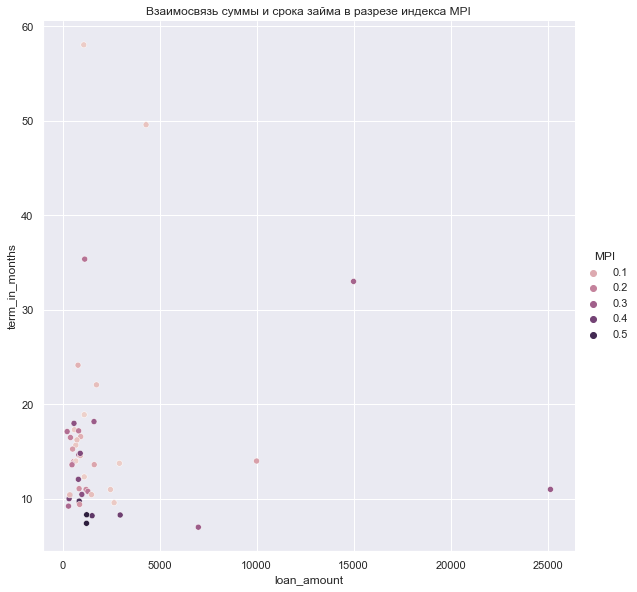

In [70]:

g = sns.relplot(x="loan_amount", y="term_in_months", hue="MPI", data=df_tmp_gr, height=8).\
set(title='Взаимосвязь суммы и срока займа в разрезе индекса MPI')


#### Вывод:
    По результатам анализа данных нельзя сделать вывод о наличии взаимосвязи между сроком или суммой займа и страной (и соответствующим уровнем MPI)